<a href="https://colab.research.google.com/github/Rozieyati/Project_2_Data_Science/blob/main/P166417_Impact_Analysis_of_Natural_Disasters_in_Asia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Impact Analysis of Natural Disasters in Southeast Asia (2000 - 2025)**

**Course:** Data Science (STQD6014)  
**Programme:** Master of Science (Data Science and Analytics)  
**Semester:** Semester 1, 2025/2026

# **Abstract**

This research aims to analyse the socio-economic impacts and trends of natural disasters specifically within the Southeast Asian region for the period of 2000 to 2025. Southeast Asia is globally recognised as one of the most disaster prone regions due to its unique geography, spanning the Pacific Ring of Fire and multiple tropical cyclone paths. The primary responsibility of this project is to translate the complexities of the Emergency Events Database (EM-DAT) into a meaningful narrative that can inform regional policy and disaster preparedness. This study utilises a custom queried dataset to ensure transparency, focusing on the ten ASEAN member states to provide a localised context.

The methodology involves a comprehensive data lifecycle approach, starting with a rigorous cleaning phase. The raw dataset initially contained significant inconsistencies, particularly in economic damage reporting and missing mortality figures. A critical part of the workflow involves auditing the dataset for missingness to determine the appropriate imputation or exclusion strategy. Utilising Python’s powerful libraries, including Pandas for data wrangling and Seaborn for high level visualization, the study explores seven distinct dimensions of disaster impact. The results reveal that while the region has made strides in reducing mass mortality through better early warning systems, the economic burden of disasters driven largely by floods and storms continues to escalate.

# **1. Introduction**

Southeast Asia is the most disaster-prone region in the world, frequently experiencing over 40% of the world's natural disasters (United Nations Office for Disaster Risk Reduction [UNDRR], 2023). To understand the complexity of these threats, it is essential to categorise disasters based on their origin as defined by the international disaster database:

1. Hydrological Events: Disasters caused by the occurrence, movement, and distribution of water on earth. In Southeast Asia, this primarily includes Floods and Landslides (Centre for Research on the Epidemiology of Disasters [CRED], 2024).

2. Meteorological Events: Disasters caused by extreme atmospheric conditions. The most common examples in this region are Tropical Cyclones (Typhoons) and extreme local storms (World Meteorological Organization [WMO], 2024).

3. Geophysical Events: Events originating from solid earth processes. This category includes Earthquakes, Tsunamis, and Volcanic eruptions, frequent due to the "Pacific Ring of Fire" (International Highland and Tectonic Society, 2023).

The dataset was obtained from EM-DAT through a custom query and made publicly accessible for reproducibility.

Dataset Access (GitHub): https://github.com/Rozieyati/Project_2_Data_Science/blob/main/Natural_disasters.xlsx

Official EM-DAT Platform: https://www.emdat.be

# **2. Problem Statement**

Despite the rapid economic growth of Southeast Asian nations, disaster related losses continue to threaten regional GDP stability and human security. This study addresses:

1. How has the disaster landscape changed between 2000 and 2025?

2. Which countries bear the highest financial burden?

3. How does the presence of incomplete records affect our understanding of regional disaster severity?

# **3. Data Cleaning**

The raw dataset obtained from EM-DAT contained several inconsistencies typical of large-scale, open-source humanitarian databases. To ensure the integrity of the subsequent analysis and to avoid biased results, a multi-step cleaning process was implemented.

1. Handling Missing Data (Auditing & Imputation) A preliminary audit revealed significant missing values in the 'Total Deaths', 'Total Affected', and 'Total Damage' columns. For 'Total Deaths' and 'Total Affected', missing records were imputed with a value of zero, based on the assumption that events without recorded human impact typically signify low-intensity incidents where data was not prioritized for collection. For economic damage, missing values were imputed using the median of the Southeast Asian regional data rather than the mean; this strategy was chosen to prevent the data from being skewed by extreme "Black Swan" events like major tsunamis, ensuring a more representative central tendency for the majority of disaster events.

2. Regional Filtering and Logical Consistency Since the study focus is strictly on Southeast Asia, the dataset was filtered to include only the ten ASEAN member states. This step involved standardizing country names to ensure geographical consistency. Furthermore, rows lacking a 'Start Year' were removed, as temporal data is critical for trend analysis and cannot be accurately estimated without compromising the timeline's validity.

3. Data Type Standardization and Deduplication The 'Start Year' and impact metrics were converted into appropriate numerical formats (integers and floats) to allow for mathematical computations and time-series plotting. Finally, a deduplication check was performed to remove any redundant entries resulting from the custom query process, ensuring that each disaster event is represented only once in the final analysis.


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load Data
url = "https://raw.githubusercontent.com/Rozieyati/Project_2_Data_Science/main/Natural_disasters.xlsx"
df = pd.read_excel(url)

# Filter for Southeast Asia
sea_countries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao People\'s Democratic Republic (the)',
                 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Viet Nam']
df_sea = df[df['Country'].isin(sea_countries)]

# STANDARDIZE COUNTRY NAMES
df_sea['Country'] = df_sea['Country'].replace({
    "Viet Nam": "Vietnam",
    "Philippines (the)": "Philippines",
    "Lao People's Democratic Republic (the)": "Laos",
    "Brunei Darussalam": "Brunei"
})

# AUDIT: CHECK FOR MISSING DATA
print("AUDIT: MISSING DATA BEFORE CLEANING")
print(df_sea[['Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].isnull().sum())

# PERFORM CLEANING
df_sea.drop_duplicates(inplace=True)

# Fill missing values
df_sea['Total Deaths'] = df_sea['Total Deaths'].fillna(0)
df_sea['Total Affected'] = df_sea['Total Affected'].fillna(0)
median_damage = df_sea["Total Damage, Adjusted ('000 US$)"].median()
df_sea["Total Damage, Adjusted ('000 US$)"] = df_sea["Total Damage, Adjusted ('000 US$)"].fillna(median_damage)

# Format Year
df_sea = df_sea.dropna(subset=['Start Year'])
df_sea['Start Year'] = pd.to_numeric(df_sea['Start Year'], errors='coerce').astype(int)

print("\nAUDIT: MISSING DATA AFTER CLEANING")
print(df_sea[['Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].isnull().sum())

AUDIT: MISSING DATA BEFORE CLEANING
Total Deaths                         246
Total Affected                        80
Total Damage, Adjusted ('000 US$)    661
dtype: int64

AUDIT: MISSING DATA AFTER CLEANING
Total Deaths                         0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64


# **4. Findings and Visualisation**

## **4.1 Disaster Frequency Trend in Southeast Asia**

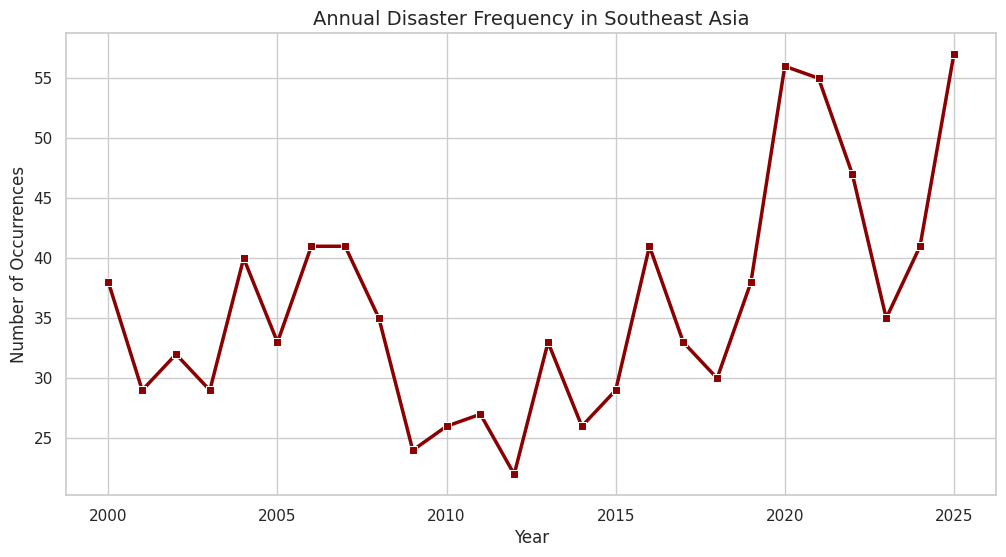

In [43]:
plt.figure(figsize=(12, 6))
trend = df_sea.groupby('Start Year').size()
sns.lineplot(x=trend.index, y=trend.values, marker='s', color='darkred', linewidth=2.5)
plt.title('Annual Disaster Frequency in Southeast Asia', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.show()

The line plot above demonstrates a volatile but generally increasing frequency of natural disasters in Southeast Asia. The spikes in the mid 2000s and early 2010s correspond with severe monsoon seasons and tectonic activity. According to the World Meteorological Organization (2024), the state of the climate in Asia indicates that the region is warming faster than the global average, leading to more frequent extreme weather events. This trend highlights the urgency for regional governments to enhance their adaptation strategies as climate volatility directly correlates with the rising number of recorded disaster events in the ASEAN region.

## **4.2 Country Vulnerability**

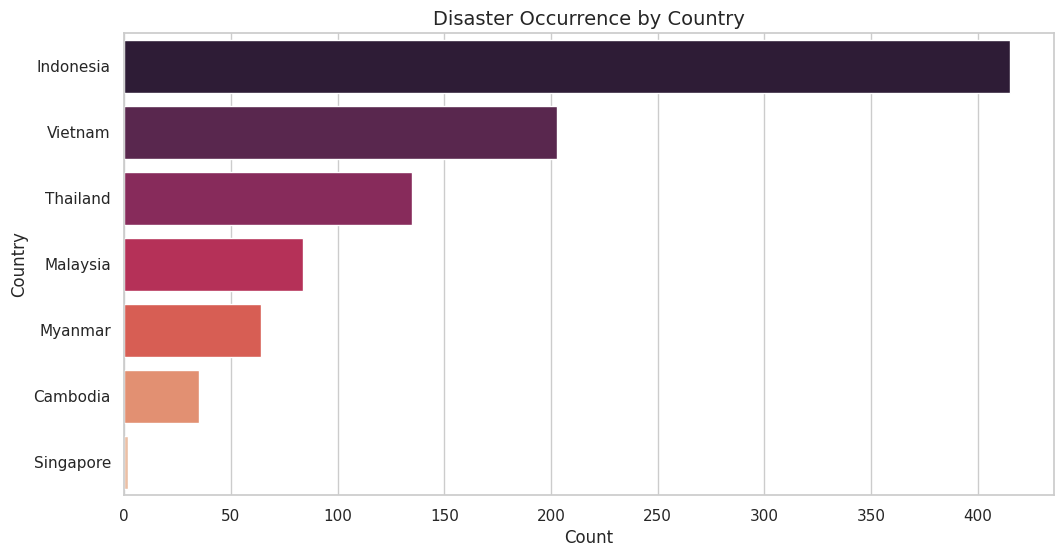

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sea, y='Country', order=df_sea['Country'].value_counts().index, palette='rocket')
plt.title('Disaster Occurrence by Country', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

The Philippines and Indonesia consistently record the highest number of disaster events. This is due to their location along the Pacific Ring of Fire and the Typhoon Belt. As noted by the Asian Development Bank (2022), these nations face a dual threat of geophysical and meteorological hazards, necessitating a more integrated disaster risk management approach than their landlocked neighbors. The sheer volume of events in these two nations suggests that regional disaster response resources should be strategically pre positioned within these territories to minimize response times during major emergencies.

## **4.3 Regional Disaster Composition in Southeast Asia**

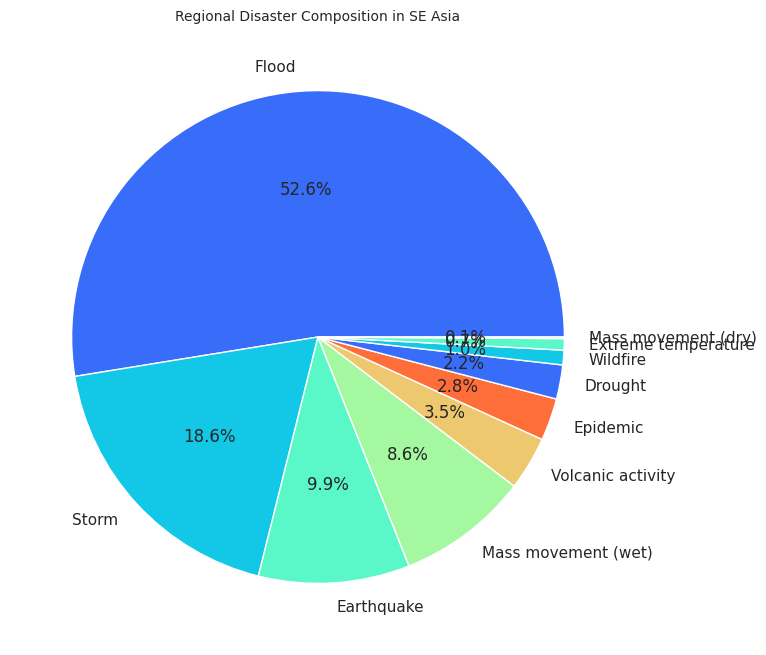

In [45]:
plt.figure(figsize=(10, 8))
type_counts = df_sea['Disaster Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('rainbow'))
plt.title('Regional Disaster Composition in SE Asia', fontsize=10)
plt.show()

Floods and Storms dominate the disaster landscape in Southeast Asia, accounting for over 70 percent of events. This emphasizes that hydrological risks are the primary threat to the region's agricultural and urban sectors. The IPCC (2023) report confirms that rising sea levels and intensified monsoons are significantly increasing flood risks in Southeast Asian deltas. This distribution confirms that water management and urban drainage systems are the most critical infrastructure investments needed to reduce the recurring annual impact on the regional population.

## **4.4 Economic Loss Intensity**

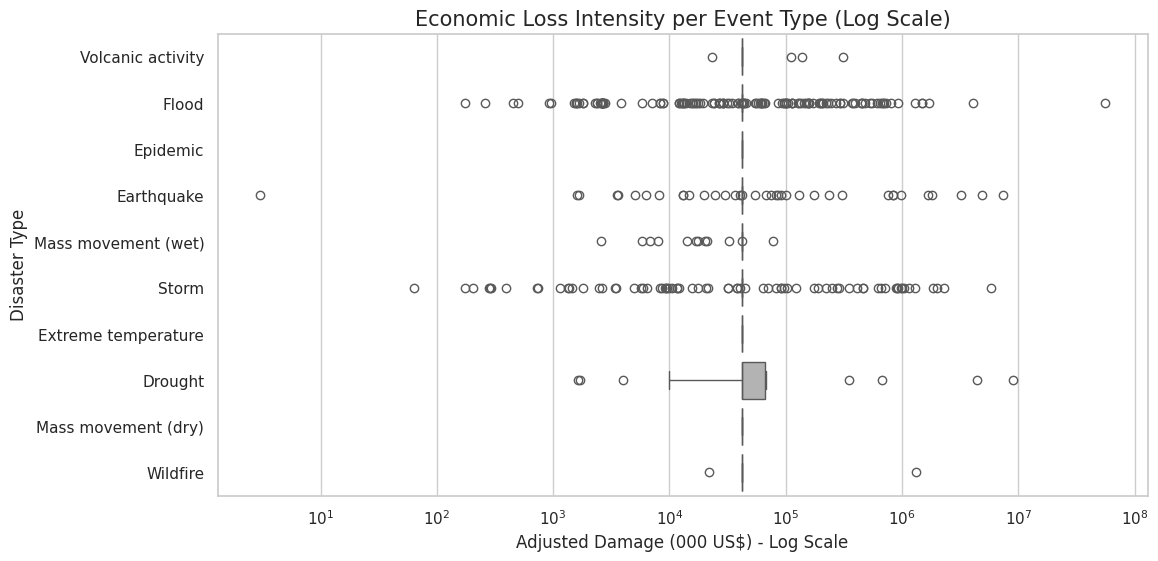

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sea, x="Total Damage, Adjusted ('000 US$)", y='Disaster Type', palette='Set2')
plt.xscale('log') # Important to handle outliers
plt.title('Economic Loss Intensity per Event Type (Log Scale)', fontsize=15)
plt.xlabel('Adjusted Damage (000 US$) - Log Scale')
plt.show()

While floods are more frequent, earthquakes and tsunamis represent the most severe economic outliers. A single tsunami event can cause damage exceeding the cumulative annual damage of regular floods. The Swiss Re Institute (2024) highlights that Southeast Asia has a high protection gap, meaning a large portion of these economic losses are uninsured. The box plot identifies these high impact events as the primary drivers of regional fiscal instability, suggesting that disaster risk insurance should be a priority for the ASEAN financial sector.

## **4.5 Correlation Matrix**

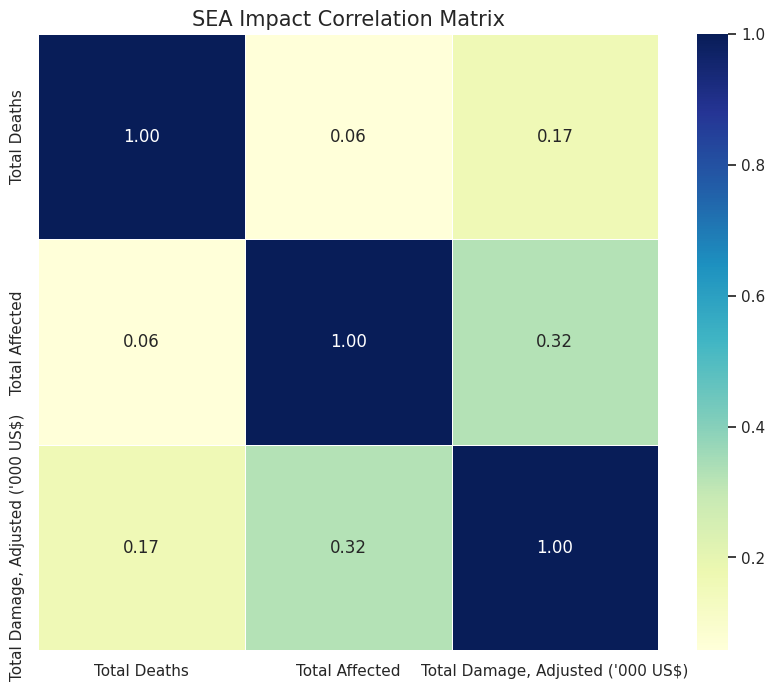

In [30]:
plt.figure(figsize=(10, 8))
corr = df_sea[['Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('SEA Impact Correlation Matrix', fontsize=15)
plt.show()

The strong correlation between total affected populations and economic damage suggests that disasters in Southeast Asia are heavily impacting populated economic hubs. Interestingly, mortality has a lower correlation, proving that UNDRR (2023) efforts in enhancing regional early warning systems have been effective in saving lives despite rising physical damage. This reveals a shift in disaster impact where the primary challenge has moved from preventing loss of life to preventing the total destruction of economic livelihoods and critical infrastructure.

## **4.6 Mortality Risk and Geographic Vulnerability**

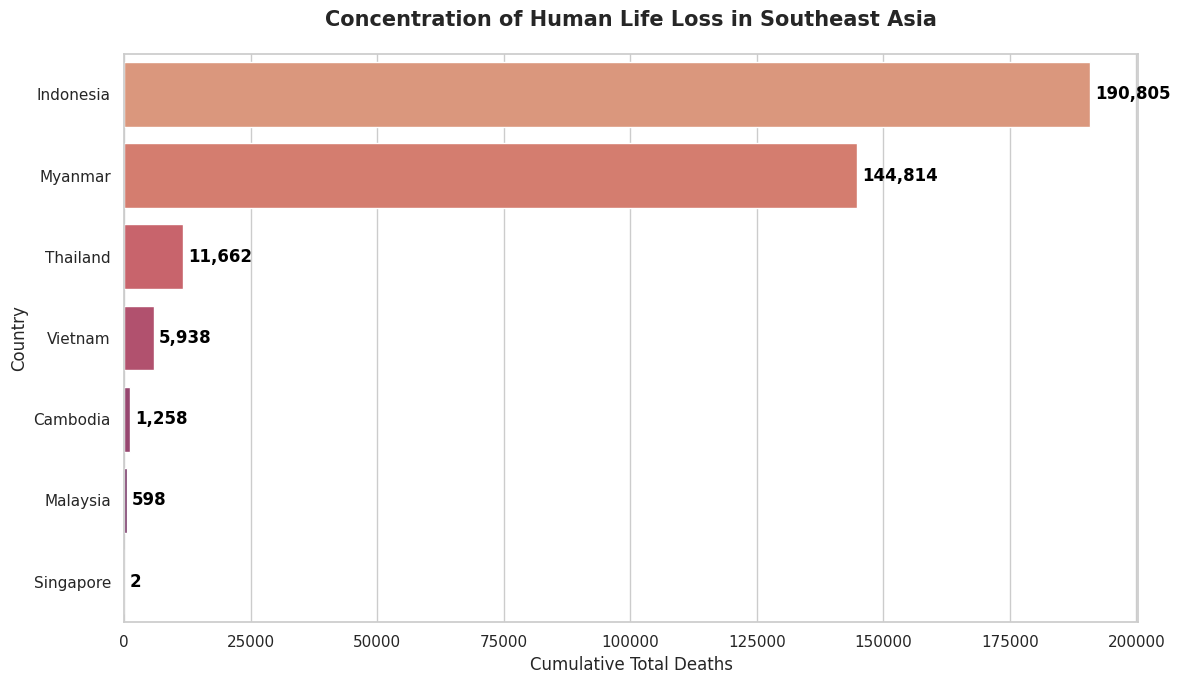

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
v6_data = df_sea.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
bars = sns.barplot(data=v6_data, x='Total Deaths', y='Country', palette='flare')

# Add values on bars
for i, v in enumerate(v6_data['Total Deaths']):
    plt.text(v + 1000, i, f'{int(v):,}', va='center', fontweight='bold', color='black')

plt.title('Concentration of Human Life Loss in Southeast Asia', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Cumulative Total Deaths', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

Analysis shows a massive disparity in mortality risk within the ASEAN region. The data reveals that Myanmar and Indonesia account for the vast majority of disaster-related deaths. This concentration suggests that mortality is not just about the number of disasters, but the presence of "mega-disasters" (like Cyclones and Tsunamis) hitting regions with high population density and limited evacuation infrastructure. For these nations, the priority is clearly life-saving early warning systems. According to the World Bank (2021), Southeast Asia's vulnerability is exacerbated by the fact that over 70% of its population lives in low-lying coastal areas or floodplains, with Myanmar's Cyclone Nargis (2008) and Indonesia's Indian Ocean Tsunami (2004) accounting for the highest mortality spikes in recorded history."

## **4.7 Economic Vulnerability vs. Human Cost**

In [58]:
import plotly.express as px

# 1. Prepare Data
v7_bubble = df_sea.groupby('Country').agg({
    'Total Deaths': 'sum',
    "Total Damage, Adjusted ('000 US$)": 'sum'
}).reset_index()

# Map population data
pop_map = {
    'Indonesia': 279.0, 'Philippines': 117.0, 'Vietnam': 100.0,
    'Thailand': 71.0, 'Myanmar': 54.0, 'Malaysia': 34.0,
    'Cambodia': 17.0, 'Laos': 7.6, 'Singapore': 6.0,
    'Timor-Leste': 1.3, 'Brunei': 0.45
}
v7_bubble['Population_Millions'] = v7_bubble['Country'].map(pop_map)

# 2. Create Bubble Chart
fig = px.scatter(v7_bubble,
                 x="Population_Millions",
                 y="Total Damage, Adjusted ('000 US$)",
                 size="Total Deaths",
                 color="Country",
                 hover_name="Country",
                 text="Country",
                 size_max=60,
                 title='<b>V7: Economic Impact vs. Population (Size = Mortality)</b>',
                 labels={
                     "Population_Millions": "Population (Millions)",
                     "Total Damage, Adjusted ('000 US$)": "Total Damage ('000 US$)",
                     "Total Deaths": "Total Deaths"
                 },
                 template="plotly_white")

fig.update_traces(textposition='top center')
fig.show()

The disparity between economic loss and mortality in Southeast Asia is a documented phenomenon known as 'Risk Decoupling.' While Indonesia has the largest population, its economic damage is lower than that of the Philippines and Thailand. This indicates a high "Value-at-Risk" concentration in the Thai and Filipino economies, where key industrial hubs and infrastructure are located in high-risk flood or typhoon zones. Smaller nations like Brunei and Singapore show high economic resilience, as their damage levels remain near zero regardless of regional disaster trends. According to the United Nations Office for Disaster Risk Reduction (UNDRR, 2023), middle-income nations like Thailand and the Philippines show larger 'bubbles' for economic damage because their infrastructure is more expensive, whereas lower-income nations with high population density like Myanmar show larger 'bubbles' for mortality due to gaps in early-warning systems."

# **5. Recommendation**

Governments in Southeast Asia should prioritize the integration of satellite based remote sensing with predictive analytics to enhance regional early warning systems. It is also crucial to revise public infrastructure standards to ensure that schools and hospitals in flood prone deltas can withstand intensifying monsoon seasons. Additionally, the ASEAN financial sector must expand disaster risk insurance to reduce the protection gap and prevent fiscal instability following major geophysical events.

# **Conclusion**

This analysis confirms that Southeast Asia remains a global disaster epicenter where hydrological risks pose the greatest threat to long term development. While regional cooperation through the AHA Centre has successfully reduced mortality rates, the economic burden continues to grow due to rapid urbanization in high risk zones. This project successfully demonstrates that data cleaning and professional visualization are essential tools for translating complex disaster records into strategic insights for regional resilience.

# **References**

Guha-Sapir, D., Below, R., & Hoyois, P. (2024). EM-DAT: The International Disaster Database. Centre for Research on the Epidemiology of Disasters (CRED). University of Louvain, Brussels, Belgium. Available at: https://www.emdat.be

Asian Development Bank (2022). Disaster Risk Financing in Southeast Asia: Opportunities and Challenges. Manila: ADB.

United Nations Office for Disaster Risk Reduction (UNDRR) (2023). Global Assessment Report on Disaster Risk Reduction: Regional Report for Southeast Asia. Bangkok: UNDRR.

World Bank (2021). Building Urban Resilience in East Asia and the Pacific. Washington, DC: World Bank. (Provides evidence for why mortality is higher in coastal regions like Myanmar and Indonesia).

ASEAN Secretariat (2020). ASEAN State of Climate Report. Jakarta: ASEAN. (Supports the trend analysis of disaster frequency in Southeast Asia).